In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_biclusters

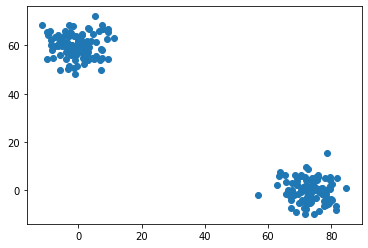

In [3]:
data = make_biclusters(shape=(200, 2), n_clusters=2, noise=5, random_state=0)[0]
plt.scatter(data[:, 0], data[:, 1])

In [69]:
epsilon = 25.0
minPts = 5

labels = {}


def find_neighbours(p, data):
    distances = np.linalg.norm(data - p, axis=1)
    return data[np.logical_and(distances < epsilon, distances > 0)]


C = 0

for p in data:
    if tuple(p) not in labels:

        neighbours = find_neighbours(p, data)
        if neighbours.shape[0] < minPts:
            labels[tuple(p)] = -1  # label as noise
            continue
        C += 1
        labels[tuple(p)] = C

        for q in neighbours:
            if tuple(q) in labels:
                if labels[tuple(q)] == -1:
                    labels[tuple(q)] = C
                elif labels[tuple(q)] != 0:
                    continue
            neighbours_q = find_neighbours(q, data)
            if neighbours_q.shape[0] >= minPts:
                labels[tuple(q)] = C
                neighbours = np.concatenate((neighbours, neighbours_q))

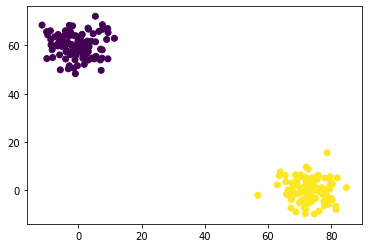

In [70]:
assignments = [labels[tuple(p)] for p in data]
plt.scatter(data[:, 0], data[:, 1], c=assignments)